# Agro-environmental regions in Ireland

Agro-environmental regions described in Holden and Brereton (2004) derived
from February rainfall data

A screenshot of the map in the paper was taken and georeferenced into vector
data

Holden, N. M. and Brereton, A. J. (2004). 'Definition of agroclimatic regions
in Ireland using hydro-thermal and crop yield data', Agricultural and Forest
Meteorology, vol. 122, no. 3, pp. 175-191. DOI:
[10.1016/j.agrformet.2003.09.010][DOI].

[DOI]: https://doi.org/10.1016/j.agrformet.2003.09.010

In [1]:
# import libraries
import os
from datetime import datetime, timezone
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import ticker
import climag.plot_configs as cplt

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2023-02-22 11:40:37.153413+00:00


In [3]:
# define data path
DATA_DIR = os.path.join(
    "data",
    "climatic-regions",
    "agro-environmental-regions",
    "agro-environmental-regions.gpkg",
)

In [4]:
data = gpd.read_file(DATA_DIR, layer="agro-environmental-regions")

In [5]:
data

,Region,Cluster,Regions,Climate,Grass,geometry
0,5,5,West Ulster,Cool temperatures (<8.5 deg C); relatively wet...,Poor grass yield; some growing season limitations,"MULTIPOLYGON (((-8.51064 54.28134, -8.51028 54..."
1,"3,4",3 & 4,Central Ulster,Cluster 3: Moderate temperatures (8.5-9.0 deg ...,Cluster 3: Poor to moderate grass yield; some ...,"MULTIPOLYGON (((-8.59627 54.22292, -8.59609 54..."
2,7,7,Northwest Connacht,Moderate temperatures (~9.0 deg C); wet rainfa...,Good grass yield,"MULTIPOLYGON (((-10.31356 53.60068, -10.31360 ..."
3,2,2,Central Connacht,Moderate temperatures (8.5-9.0 deg C); average...,Moderate to good grass yield; average conditio...,"MULTIPOLYGON (((-10.22229 53.39345, -10.22229 ..."
4,1,1,East Ulster & East Leinster,Warm temperatures (~9.5 deg C); relatively dry...,Water stress in grass,"MULTIPOLYGON (((-5.80333 54.82402, -5.80314 54..."
5,6,6,South & Southwest Munster,Warm temperatures (9.5-10.0 deg C); relatively...,Good grass yield,"MULTIPOLYGON (((-10.54655 51.76489, -10.54665 ..."


In [6]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
data.shape

(6, 6)

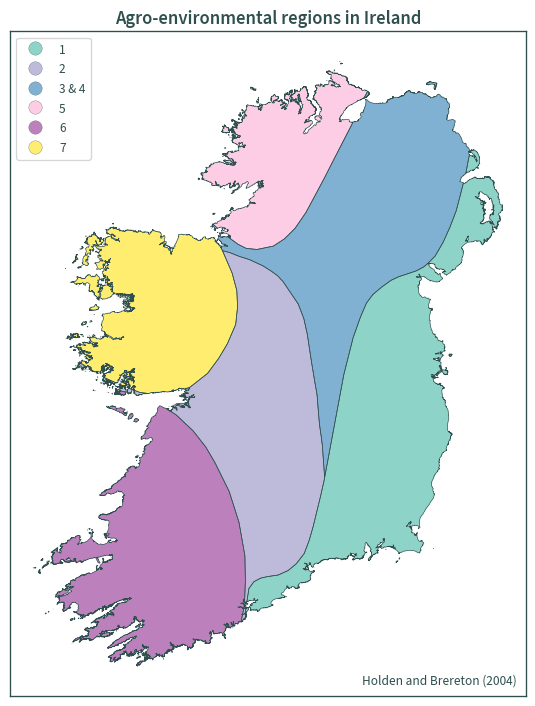

In [9]:
ax = data.plot(
    column="Cluster",
    legend=True,
    figsize=(9, 9),
    cmap="Set3",
    legend_kwds=dict(loc="upper left"),
)

# ax.xaxis.set_major_formatter(cplt.longitude_tick_format)
# ax.yaxis.set_major_formatter(cplt.latitude_tick_format)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

for legend_handle in ax.get_legend().legend_handles:
    legend_handle.set_markeredgewidth(0.2)
    legend_handle.set_markeredgecolor("darkslategrey")
ax.axes.tick_params(labelbottom=False, labelleft=False)

data.boundary.plot(ax=ax, color="darkslategrey", linewidth=0.5)

plt.text(-7, 51.3, "Holden and Brereton (2004)")
plt.title("Agro-environmental regions in Ireland")
plt.show()